In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/ecr/PPR_ECR.csv', index_col=0).dropna()

num_teams = 12
num_roster_spots = 16
#Set to number of teams and roster spots for league
draft_pool = num_teams*num_roster_spots

df = df[:draft_pool]

print(df.shape)
df.head()

(192, 10)


,Player,Team,Rank,Pos,Bye,Best,Worst,Avg,Std Dev,ADP
1,Christian McCaffrey,CAR,1.0,RB1,13.0,1.0,6.0,1.1,0.4,1.0
2,Saquon Barkley,NYG,2.0,RB2,11.0,1.0,4.0,2.2,0.6,2.0
3,Ezekiel Elliott,DAL,3.0,RB3,10.0,2.0,14.0,3.1,0.8,3.0
4,Alvin Kamara,NO,4.0,RB4,6.0,1.0,10.0,4.0,1.3,6.0
6,Dalvin Cook,MIN,5.0,RB5,7.0,2.0,20.0,6.4,2.5,5.0


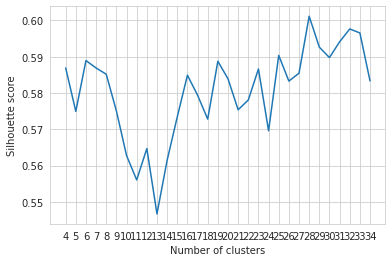

In [2]:
#Silhouette Analysis for optimal number of clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns; sns.set_style('whitegrid');

avgs = []

start = 4 
stop = 35
#Setting range from 4 to 35  clusters
for n_clusters in range(start, stop):
 
    
    X = df[['Avg']].values
    
    
    model = KMeans(n_clusters=n_clusters) 
    
    model.fit(X) 
    
    labels = model.predict(X)
    
    silhouette_avg = silhouette_score(X, labels) 
    
    avgs.append(silhouette_avg) 


plt.plot(np.arange(start, stop, 1), avgs);
plt.xlabel('Number of clusters');
plt.ylabel('Silhouette score');

plt.xticks(np.arange(start, stop, 1));
#Silhouette analysis gives 29 as optimal number of clusters

In [3]:
pd.set_option('display.max_rows', None)

k = 29

model = KMeans(n_clusters=k)

model.fit(X)

labels = model.predict(X)

#This function maps the labels to the fantasy football tiers
def assign_tiers(labels):
     
    unique_labels = []
    tiers = []
    
    for i in labels:
        
        if i not in unique_labels:
            unique_labels.append(i)
        
        tiers.append(
            len(set(unique_labels))
        )
        
    return tiers

tiers = assign_tiers(labels)

df['Tier'] = tiers

df.set_index('Tier').sort_values(by = 'Avg')

,Player,Team,Rank,Pos,Bye,Best,Worst,Avg,Std Dev,ADP
Tier,,,,,,,,,,
1,Christian McCaffrey,CAR,1.0,RB1,13.0,1.0,6.0,1.1,0.4,1.0
1,Saquon Barkley,NYG,2.0,RB2,11.0,1.0,4.0,2.2,0.6,2.0
1,Ezekiel Elliott,DAL,3.0,RB3,10.0,2.0,14.0,3.1,0.8,3.0
1,Alvin Kamara,NO,4.0,RB4,6.0,1.0,10.0,4.0,1.3,6.0
1,Dalvin Cook,MIN,5.0,RB5,7.0,2.0,20.0,6.4,2.5,5.0
1,Michael Thomas,NO,6.0,WR1,6.0,3.0,27.0,6.7,1.7,4.0
2,Davante Adams,GB,7.0,WR2,5.0,5.0,30.0,9.6,2.2,8.0
2,Derrick Henry,TEN,8.0,RB6,7.0,5.0,27.0,10.2,5.7,7.0
2,Clyde Edwards-Helaire,KC,9.0,RB7,10.0,4.0,60.0,11.0,5.9,21.0


In [4]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set_style('whitegrid')

#Creating a visualization for our project
def make_clustering_viz(df, pos=None, figsize=(20, 20)):
    
    if pos:
        df = df.loc[df['Pos'].str.contains(pos)]
    
    colors = ['purple', 'magenta', 'red', 'blue', 'orange', 'green',
              'salmon', 'yellow', 'black', 'grey', '#3498db', '#16a085', '#f4d03f', '#f1948a',
              '#48c9b0', '#3498db', '#e74c3c', '#d7bde2', '#d0d3d4'
              ] #From https://htmlcolorcodes.com/
    
    colors = dict(zip(range(1, k+1), colors[:k]))
    
    plt.figure(figsize=figsize)
    
    plt.scatter(x=df['Avg'], 
                y=df['Rank'], 
                c='#212f3d', 
                alpha=0.9, 
                s=7 
               )
    
    yticks = []
    
    for _, row in df.iterrows():
        
        
        xmin = row['Best'] 
        xmax = row['Worst']
        
        ymin, ymax = row['Rank'], row['Rank'] 
        
        player = row['Player'] 
        
        tier = row['Tier']
        
        plt.plot((xmin, xmax), (ymin, ymax), c=colors.get(tier, 'black'), alpha=0.8) 
        
        yticks.append(player) 
    
    patches = []
    for tier, color in colors.items():
        patch = mpatches.Patch(color=color, label=f'Tier {tier}') 
        patches.append(patch)
    
    plt.legend(handles=patches, borderpad=1, fontsize=12) 
    
    plt.xlabel('Average Expert Rank', fontsize=12)
    plt.ylabel('Expert Consensus Rank', fontsize=12)
    plt.yticks(df['Rank'], yticks, fontsize=12)
    
    plt.title('Tiers for the 2020 Draft. ECR vs. Average Expert Rank.', fontsize=12)
    
    
    plt.gca().invert_yaxis()
    plt.show()


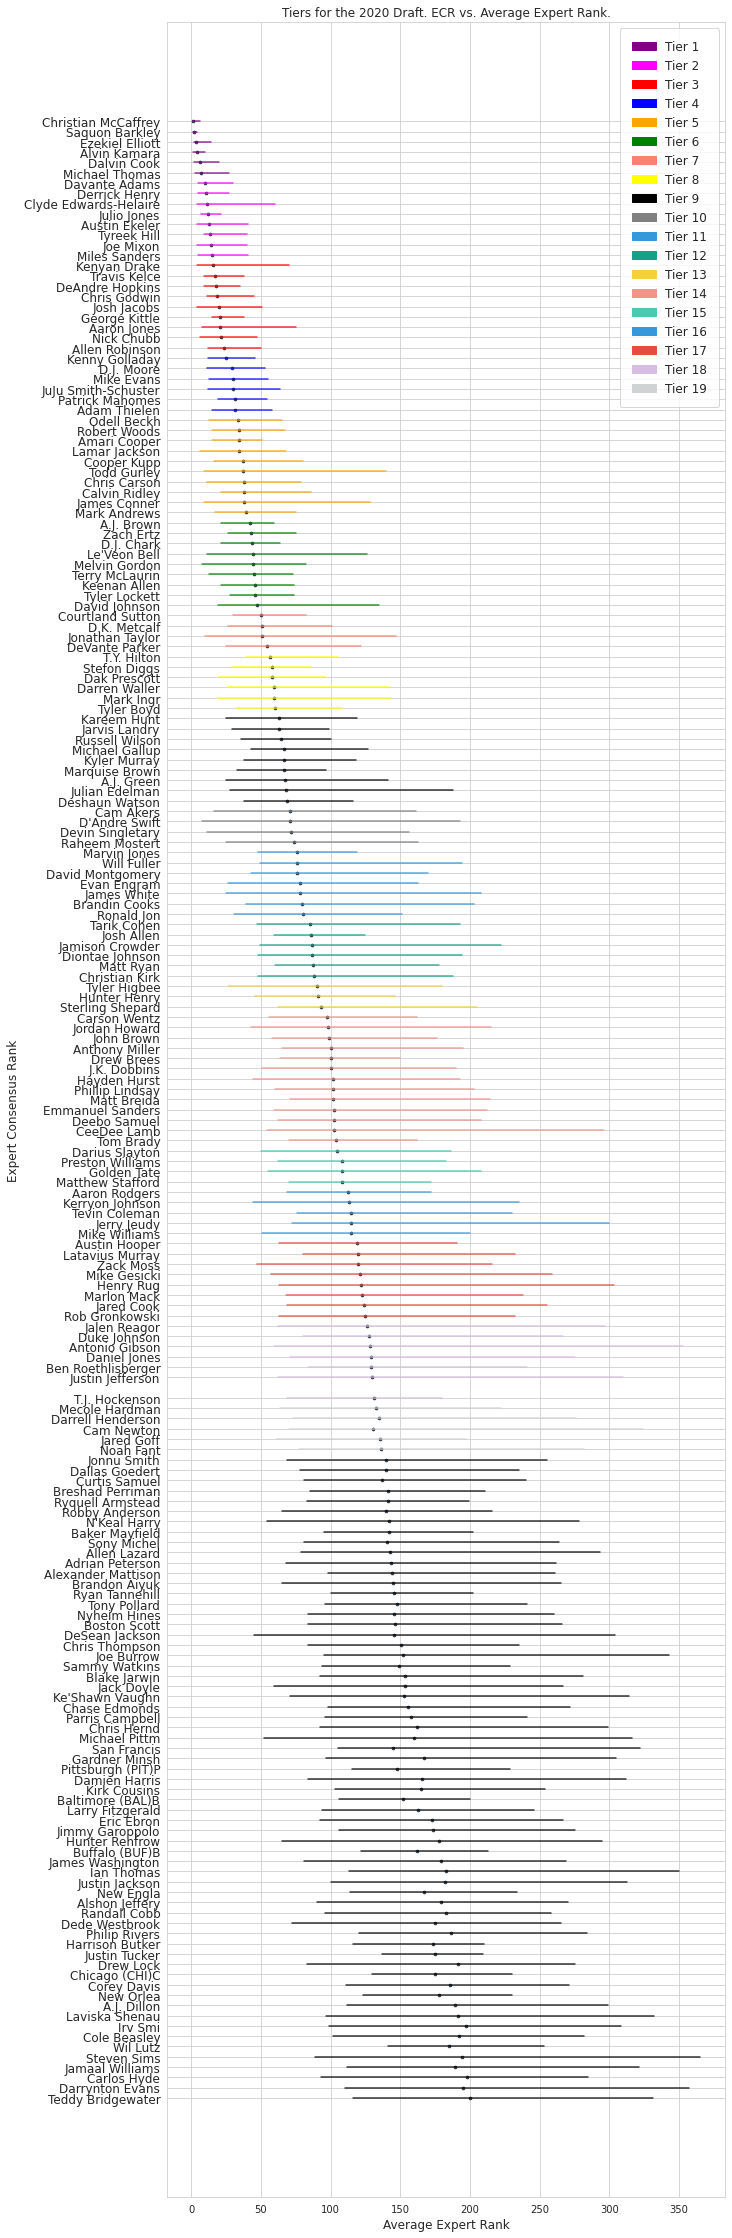

In [5]:
make_clustering_viz(df, figsize=(10, 40))

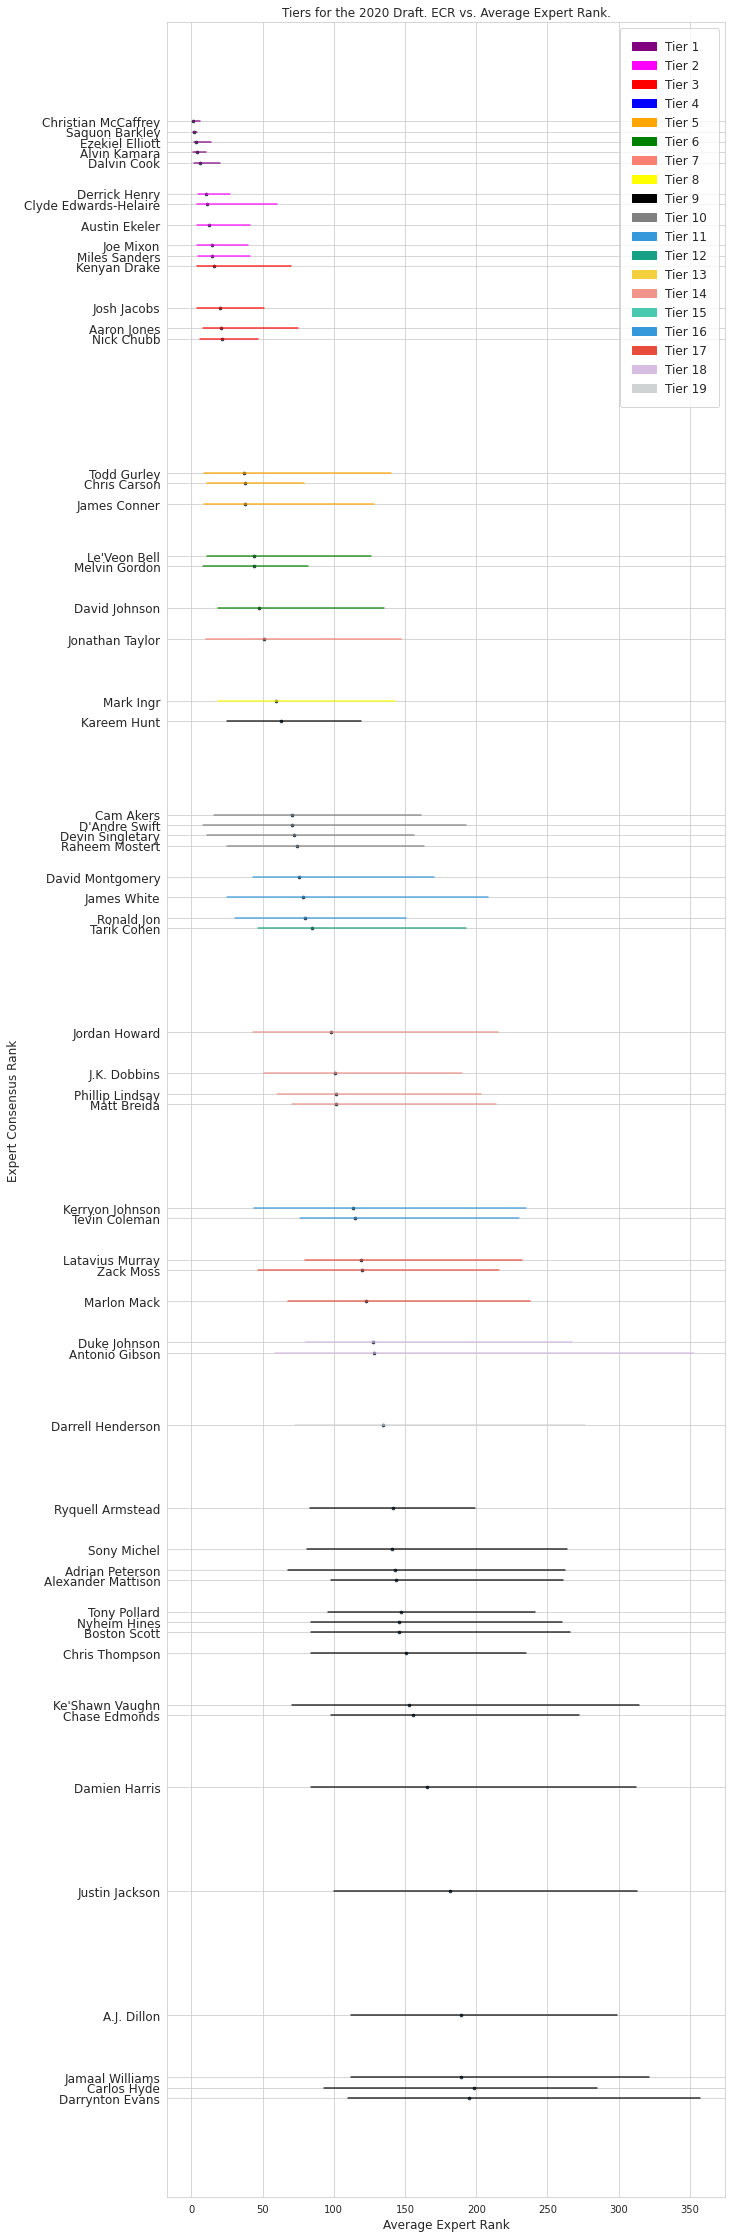

In [6]:
make_clustering_viz(df,'RB', figsize=(10, 40))
#Can differentiate about various positions.